In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import creds

plt.style.use ('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_plat = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred


fred_key = creds.api_key

 1. Create the Fred Object

In [31]:
fred = Fred(fred_key)

# 2. Search for economic data!

In [33]:
sp_search = fred.search('S&P', order_by='popularity')

In [34]:
sp_search.shape

(1000, 15)

In [35]:
sp_search.head(1)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-09-11,2022-09-11,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-09-08,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-09-09 09:13:01-05:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...


# 3. Pull Raw Data & Plot

In [22]:
sp500 = fred.get_series(series_id='SP500')

<AxesSubplot:title={'center':'S&P 500'}>

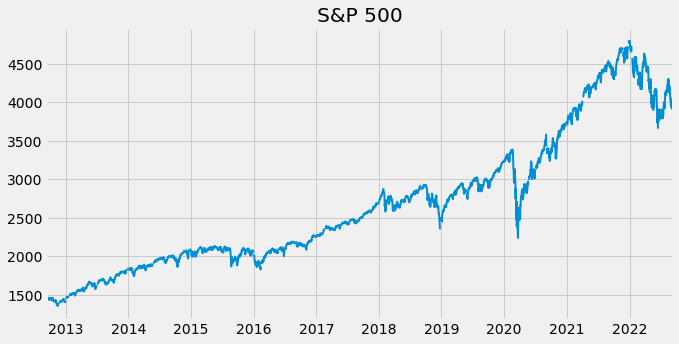

In [23]:
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

# 4. Pull and Join Multiple Data Series

In [37]:
uemp_resolt = fred.search('unemployment')

In [69]:
unrate = fred.get_series('UNRATE')
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"').shape
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

<AxesSubplot:>

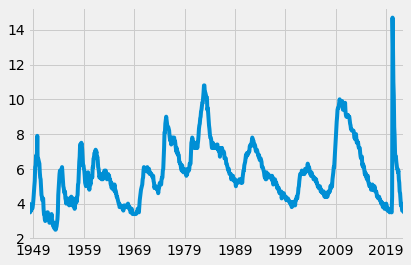

In [42]:
unrate.plot()

In [90]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
uemp_results = pd.concat(all_results, axis=1).drop(['M08310USM156SNBR','DSUR'], axis=1)

ValueError: Too Many Requests.  Exceeded Rate Limit

In [83]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

ValueError: Too Many Requests.  Exceeded Rate Limit

In [ ]:
all_results[1]

In [80]:
results.to_frame(name=myid)

,UNRATE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2022-04-01,3.6
2022-05-01,3.6
2022-06-01,3.6
2022-07-01,3.5


In [72]:
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-09-11,2022-09-11,Unemployment Rate,1948-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:03-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-09-11,2022-09-11,Unemployment Rate,1948-01-01,2022-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-09-02 07:43:04-05:00,53,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2022-09-11,2022-09-11,Unemployment Rate - Black or African American,1972-01-01,2022-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-09-02 07:44:07-05:00,66,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2022-09-11,2022-09-11,Unemployment Rate - Black or African American,1972-01-01,2022-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-09-02 07:43:11-05:00,22,The series comes from the 'Current Population ...
CAUR,CAUR,2022-09-11,2022-09-11,Unemployment Rate in California,1976-01-01,2022-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-08-22 09:00:05-05:00,56,None
